In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [2]:
data = pd.read_csv('/Users/anastasia/Downloads/Marketing+Data/marketing_data.csv')
dictionary = pd.read_csv('/Users/anastasia/Downloads/Marketing+Data/marketing_data_dictionary.csv')

In [3]:
pd.options.display.max_colwidth
pd.options.display.width=300

In [4]:
dictionary

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [6]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India
2239,4070,1969,PhD,Married,94871.0,0,2,2012-09-01,99,169,...,4,7,0,1,1,0,0,1,0,Canada


In [7]:
data.shape

(2240, 28)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

# 1. Очистка данных / Data Cleaning

## 1.1. Пустые значения / Null values

#### На первый взгляд, датасет полный и часть информации отсутствует только в колонке Income

In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [11]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [12]:
data[data[' Income '].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,Germany
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,USA
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,Australia
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,Australia
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,Canada
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,Germany
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,USA
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,Germany
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,Australia
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,Australia


### Cоздадим новую таблицу без этих строк / We won't drop it, instead we'll create a new table without these rows 

In [13]:
data2 = data[data[' Income '].isna() != True]

In [14]:
data2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India


In [15]:
data2.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [16]:
data2.rename(columns = {' Income ': 'Income'}, inplace = True)

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/1513873754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns = {' Income ': 'Income'}, inplace = True)


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [18]:
unique_values = data2.nunique()
print("Unique values:\n", unique_values)

Unique values:
 ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64


In [19]:
data2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.2. Дублкаты / Duplicates

In [20]:
data2.duplicated().sum()

0

In [21]:
data2.duplicated(subset=['ID']).sum()

0

In [22]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [23]:
data2.duplicated(subset=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'Country']).sum()

47

In [24]:
data2 = data2.drop_duplicates(subset=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'Country'])

In [25]:
data2.shape

(2169, 28)

## 1.3.  Трансформация типов данных / Data Transformation

### Прежде чем работать с выбросами, выполним преобразование данных. Это поможет нам лучше отсортировать выбросы и будет необходимо для дальнейшего анализа. / Before dealing with outliers, let's do a data transformation. This will help us to sort out the outliers better and will be necessary for further analysis.

In [26]:
data2.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

### Почти все столбцы уже имеют правильные типы данных, за исключением столбца Dt_Customer. Преобразуем тип данных этого столбца к типу timedate. / Almost all of the columns already have the correct data types, except for Dt_Customer column. Let's transform the data type of this columns into timedate type.

In [27]:
data2['Dt_Customer'] = pd.to_datetime(data2['Dt_Customer'])

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/4290681742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Dt_Customer'] = pd.to_datetime(data2['Dt_Customer'])


In [28]:
data2.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

In [29]:
data2.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('<M8[ns]')],
      dtype=object)

### Преобразуем также столбец Year_Birth (Год_рождения) в столбец Age (Возраст) / Let's also transform Year_Birth column into Age column

Из описания набора данных мы знаем, что данные получены за 2014 год и ранее. Мы также можем проверить это, посмотрев на минимальную и максимальную даты, когда люди стали клиентами. / From the dataset description, we know that the data are for 2014 and before. We can also check this by looking at the minimum and maximum dates when people became customers.

In [30]:
print('Min date:' + ' '+
str(data2.Dt_Customer.min()))
print('Max date:' + ' '+
str(data2.Dt_Customer.max()))

Min date: 2012-07-30 00:00:00
Max date: 2014-06-29 00:00:00


We see that the data in our dataset is from 2012-2014. Let's calculate the age of buyers based on 2014.

In [31]:
data2['Age'] = 2014 - data2.Year_Birth

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/1072324747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Age'] = 2014 - data2.Year_Birth


In [32]:
data2[['Age','Year_Birth']]

,Age,Year_Birth
0,44,1970
1,53,1961
2,56,1958
3,47,1967
4,25,1989
...,...,...
2235,38,1976
2236,37,1977
2237,38,1976
2238,36,1978


In [33]:
data2['Age'].dtypes

dtype('int64')

## 1.4. Выбросы и анализ всех колонок / Outliers and all columns' analysis

### Проверим типы данных в столбцах, чтобы затем решить, что делать с выбросами в каждом столбце / Let's check the data types in the columns to then decide what to do with the outliers in each column

In [34]:
data2.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

### 1.4.1. Данные с типом Object / Object type outliers

In [35]:
object_columns = data2.select_dtypes(include=['object'])
object_columns.columns

Index(['Education', 'Marital_Status', 'Country'], dtype='object')

### 1.4.1.1. Образование/ Education

In [36]:
data2.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [37]:
object_ed = pd.concat([data2.Education.value_counts(),
                round((data2.Education.value_counts(normalize = True))*100,2)], 
                axis=1,
                keys=('count','%'))
object_ed

,count,%
Graduation,1090,50.25
PhD,470,21.67
Master,361,16.64
2n Cycle,194,8.94
Basic,54,2.49


### 1.4.1.2. Семейное положение / Marital_Status

In [38]:
data2.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [39]:
object_ms = pd.concat([data2.Marital_Status.value_counts(),
                round((data2.Marital_Status.value_counts(normalize = True))*100,2)], 
                axis=1,
                keys=('count','%'))
object_ms

,count,%
Married,838,38.64
Together,563,25.96
Single,462,21.30
Divorced,226,10.42
Widow,73,3.37
Alone,3,0.14
YOLO,2,0.09
Absurd,2,0.09


In [40]:
data2[(data2.Marital_Status == 'Alone') | (data2.Marital_Status == 'YOLO') | (data2.Marital_Status == 'YOLO')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
103,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,0,Canada,41
104,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,1,0,India,41
286,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,6,0,0,0,0,0,0,0,Canada,26
838,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,5,1,0,0,0,0,1,0,Canada,41
959,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,8,0,0,0,0,0,0,0,Canada,56


'YOLO' и 'Absurd' - это вовсе не семейное положение. Кроме того, таких клиентов очень мало. Столбец 'Alone', безусловно, можно отнести к столбцу 'Single'. Приравняем столбцы "Alone", "YOLO" и "'Absurd" к столбцу "Singles".

'YOLO' and 'Absurd' are not marital statuses at all. Besides, there are very few such customers. Column 'Alone' can definitely be attributed to the column 'Single'. Let's equate columns 'Alone', 'YOLO' and 'Absurd to 'Singles'.

In [41]:
data2.Marital_Status[(data2.Marital_Status == 'Alone') | (data2.Marital_Status == 'Absurd') | (data2.Marital_Status == 'YOLO')] = 'Single'

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/492322735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Marital_Status[(data2.Marital_Status == 'Alone') | (data2.Marital_Status == 'Absurd') | (data2.Marital_Status == 'YOLO')] = 'Single'
/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/492322735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Marital_Status[(data2.Marital_Status == 'Alone') | (data2.Marital_Status == 'Absurd') | (data2.Marital_Status == 'YOLO')] = 'Single'


In [42]:
object_ms2 = pd.concat([data2.Marital_Status.value_counts(),
                round((data2.Marital_Status.value_counts(normalize = True))*100,2)], 
                axis=1,
                keys=('count','%'))
object_ms2

,count,%
Married,838,38.64
Together,563,25.96
Single,469,21.62
Divorced,226,10.42
Widow,73,3.37


### 1.4.1.3. Страна / Country

In [43]:
data2.Country.unique()

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [44]:
object_ed = pd.concat([data2.Country.value_counts(),
                round((data2.Country.value_counts(normalize = True))*100,2)], 
                axis=1,
                keys=('count','%'))
object_ed

,count,%
Spain,1053,48.55
Saudi Arabia,335,15.44
Canada,263,12.13
Australia,146,6.73
India,146,6.73
Germany,116,5.35
USA,107,4.93
Mexico,3,0.14


In [45]:
data2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,Spain,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,Canada,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,USA,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,Australia,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,Spain,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,USA,38
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,Spain,37
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,Spain,38
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,India,36


### 1.4.2. Данные иных типов / Other types outliers

In [46]:
data2.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

### 1.4.2.1 Наличие детей/подростков / Kids and teens

In [47]:
data2.Kidhome.unique()

array([0, 1, 2])

In [48]:
data2.Teenhome.unique()

array([0, 1, 2])

In [49]:
object_ed = pd.concat([data2.Kidhome.value_counts(),
                round((data2.Kidhome.value_counts(normalize = True))*100,2)], 
                axis=1,
                keys=('count','%'))
object_ed

,count,%
0,1256,57.91
1,868,40.02
2,45,2.07


In [50]:
object_ed = pd.concat([data2.Teenhome.value_counts(),
                round((data2.Teenhome.value_counts(normalize = True))*100,2)], 
                axis=1,
                keys=('count','%'))
object_ed

,count,%
0,1123,51.78
1,995,45.87
2,51,2.35


In [51]:
data2['Children'] = data2['Kidhome'] + data2['Teenhome']

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/586765554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Children'] = data2['Kidhome'] + data2['Teenhome']


In [52]:
data2['Children'].describe()

count    2169.000000
mean        0.947441
std         0.747076
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Children, dtype: float64

In [53]:
object_ed = pd.concat([data2.Children.value_counts(),
                round((data2.Children.value_counts(normalize = True))*100,2)], 
                axis=1,
                keys=('count','%'))
object_ed

,count,%
1,1100,50.71
0,616,28.40
2,404,18.63
3,49,2.26


In [54]:
other_columns = data2.select_dtypes(exclude=['object','datetime64[ns]'])
other_columns.columns[1:]

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Age', 'Children'],
      dtype='object')

In [55]:
other_columns = other_columns[other_columns.columns[1:]]

In [56]:
summary_stats = other_columns.describe()
print("Summary statistics:")
pd.DataFrame(summary_stats)

Summary statistics:


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Children
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,...,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,1968.794375,52284.818811,0.441678,0.505763,49.027201,305.335639,26.265099,167.365145,37.550945,27.002766,...,5.321807,0.073306,0.074689,0.073767,0.064546,0.013370,0.150761,0.009682,45.205625,0.947441
std,11.997622,25241.575183,0.536866,0.545096,28.987332,337.330188,39.638045,225.181320,54.754453,41.032556,...,2.422924,0.260698,0.262949,0.261451,0.245779,0.114881,0.357898,0.097942,11.997622,0.747076
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1959.000000,35388.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
50%,1970.000000,51411.000000,0.000000,0.000000,49.000000,176.000000,8.000000,68.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000
75%,1977.000000,68487.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,3.000000


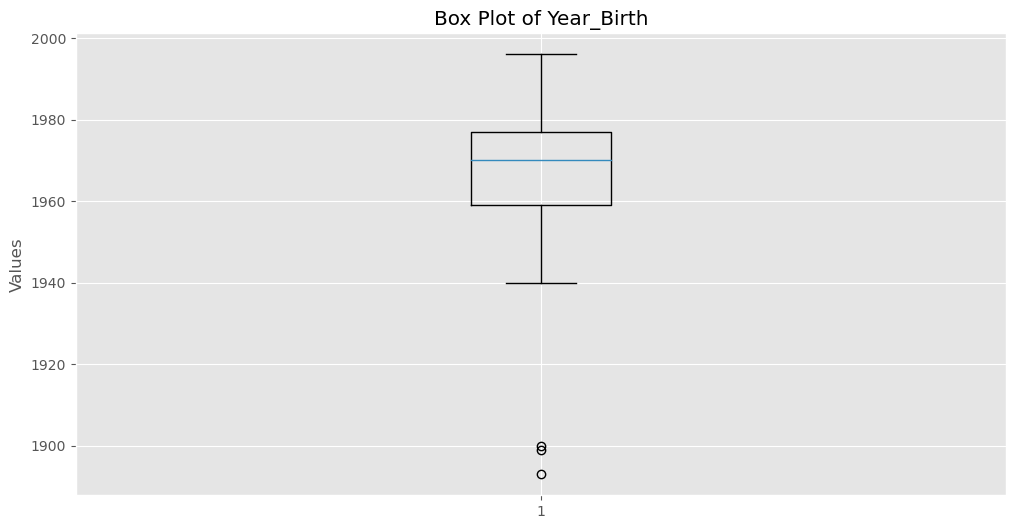

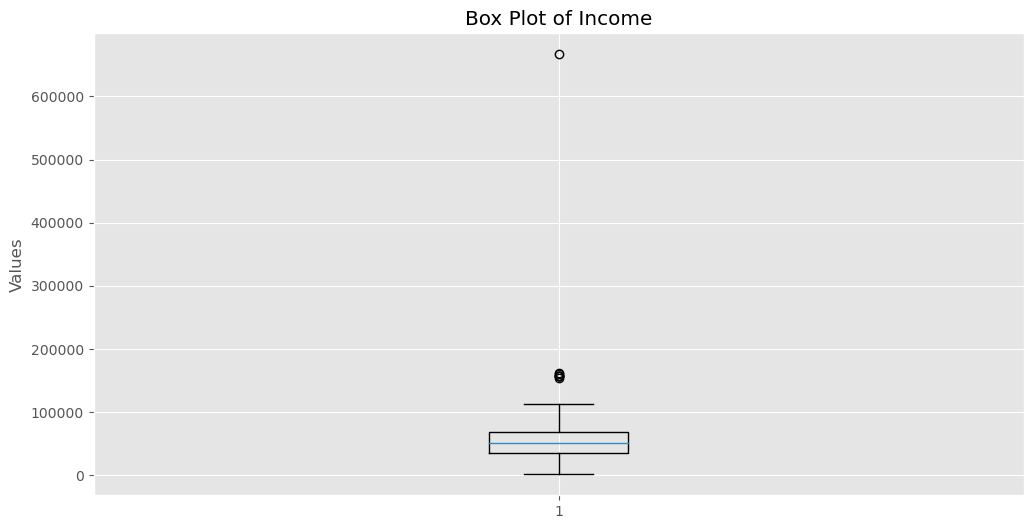

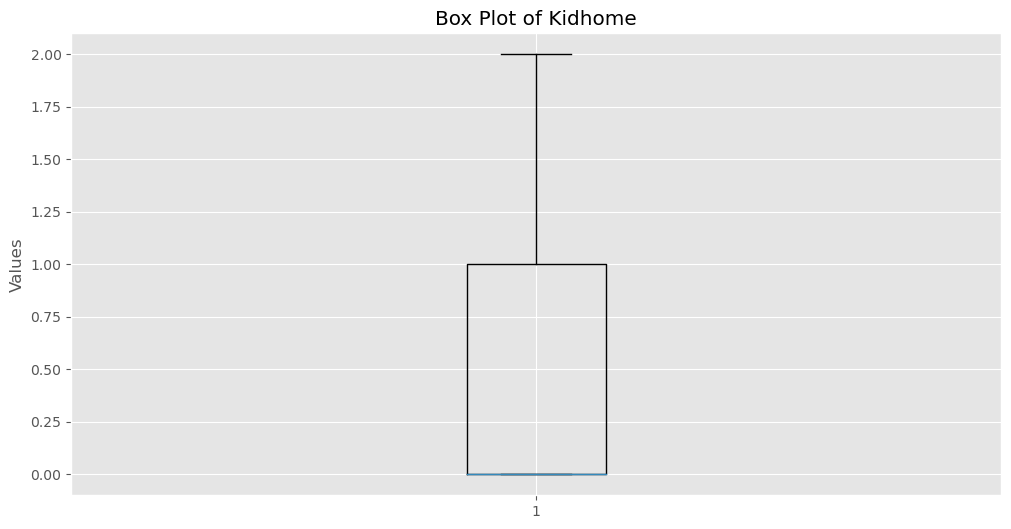

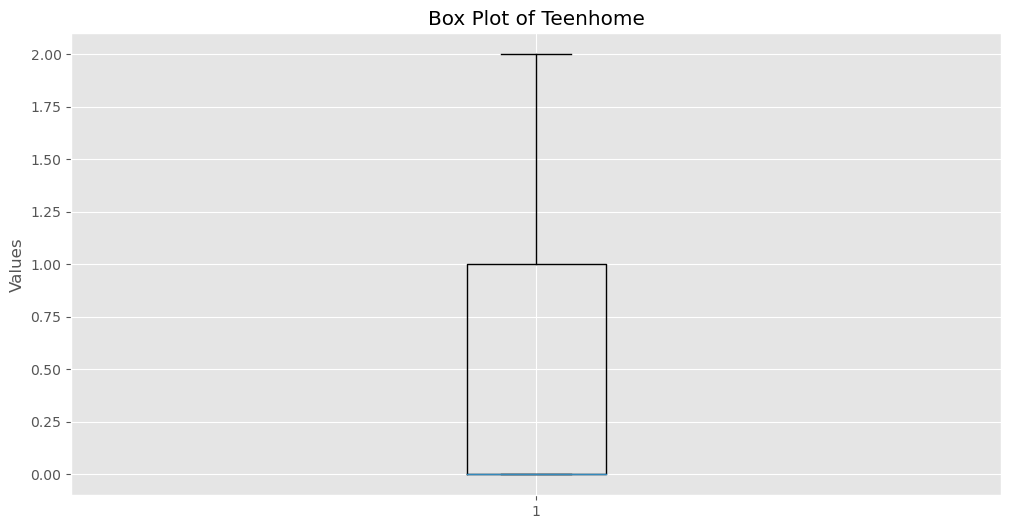

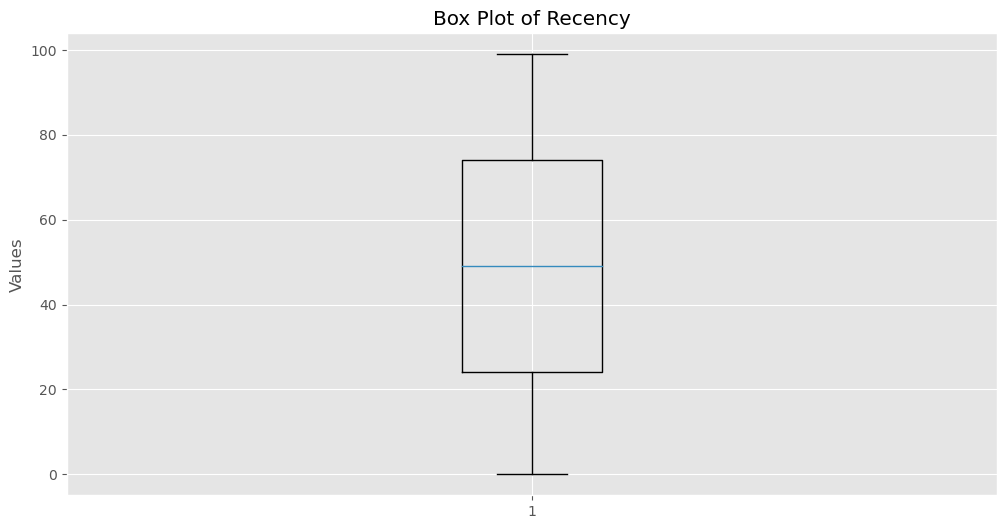

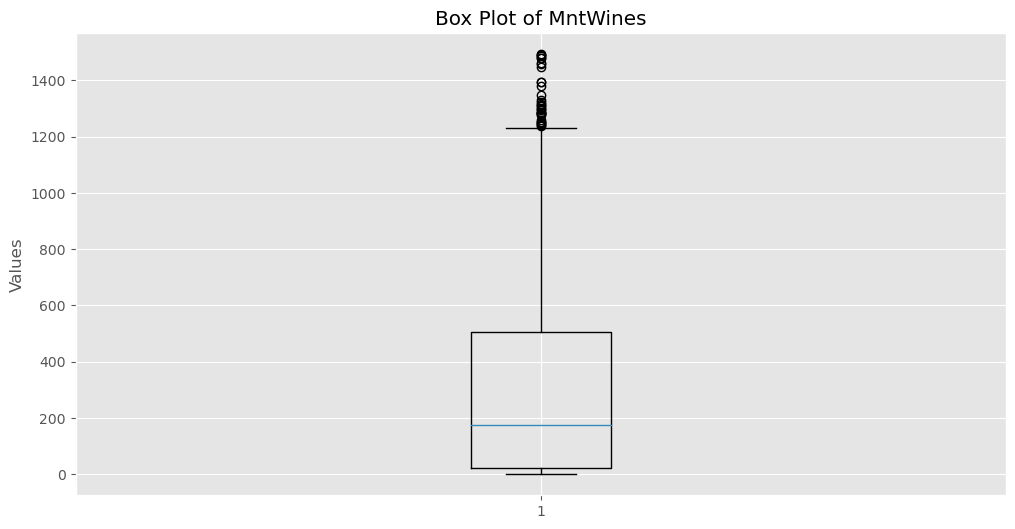

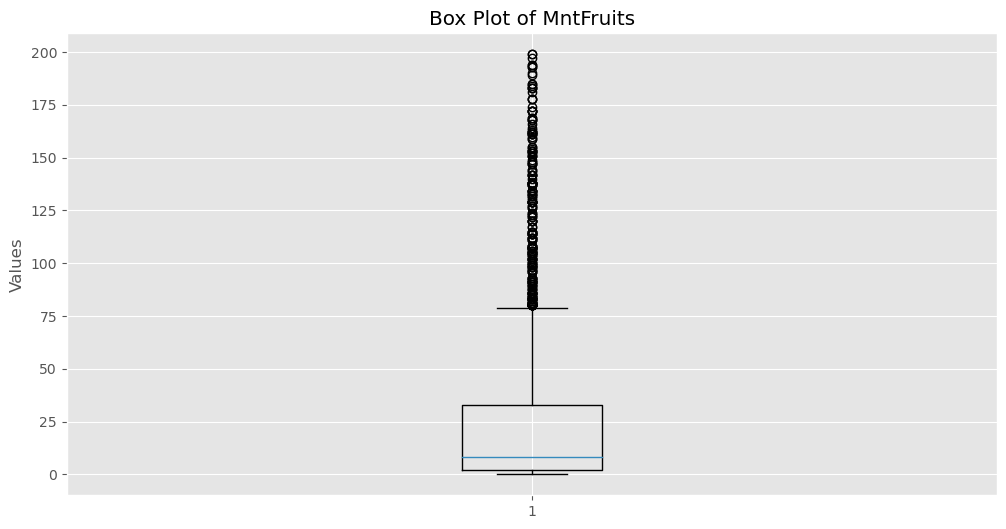

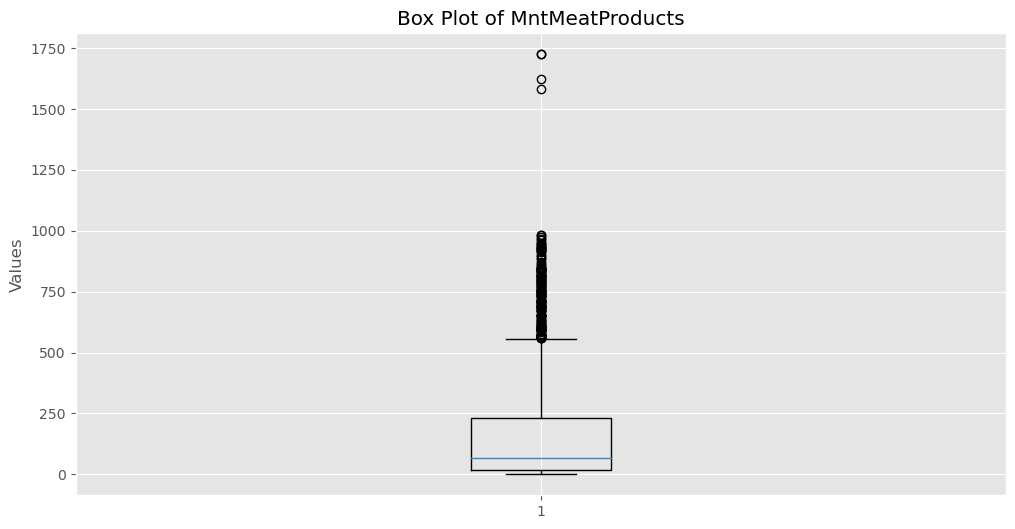

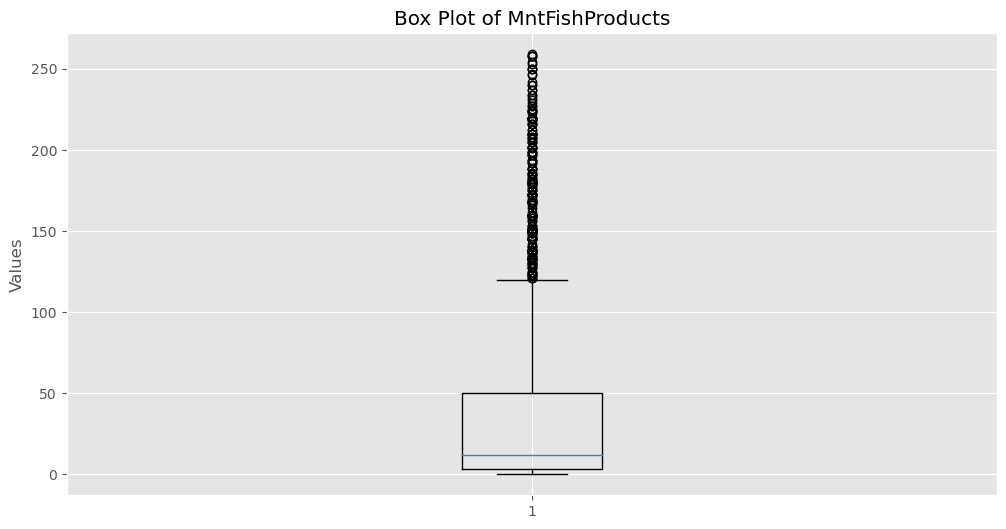

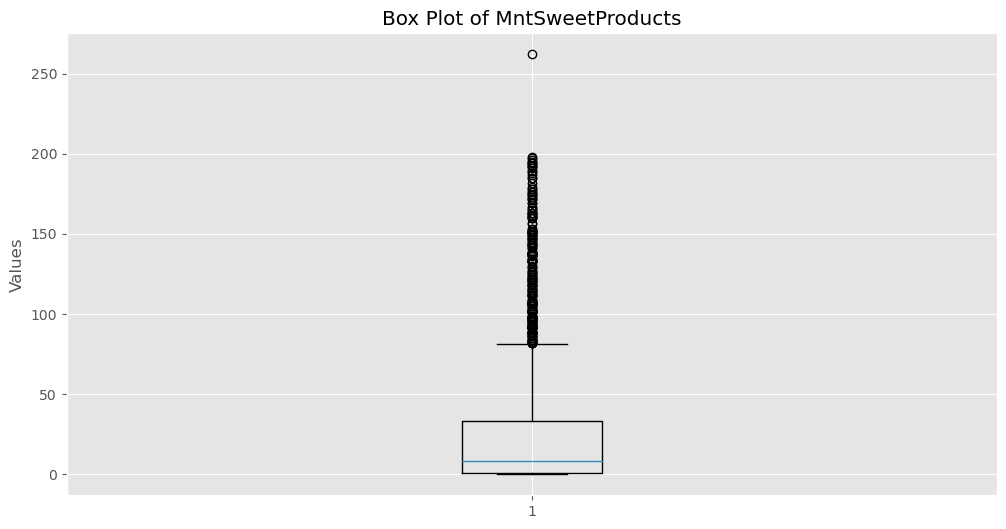

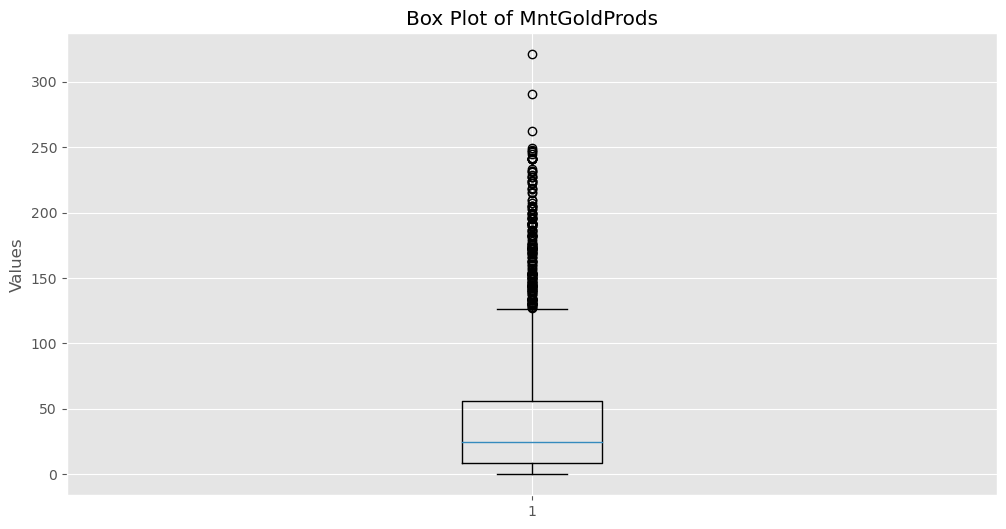

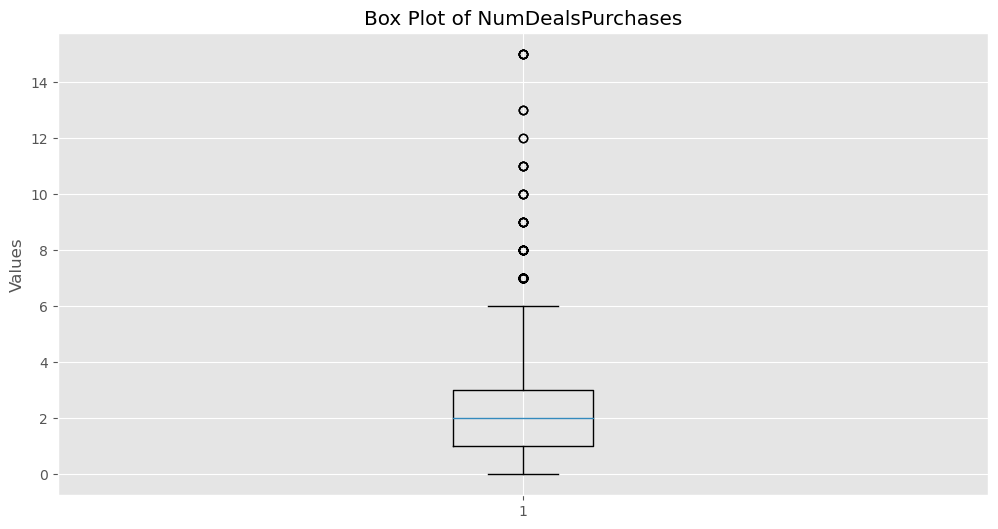

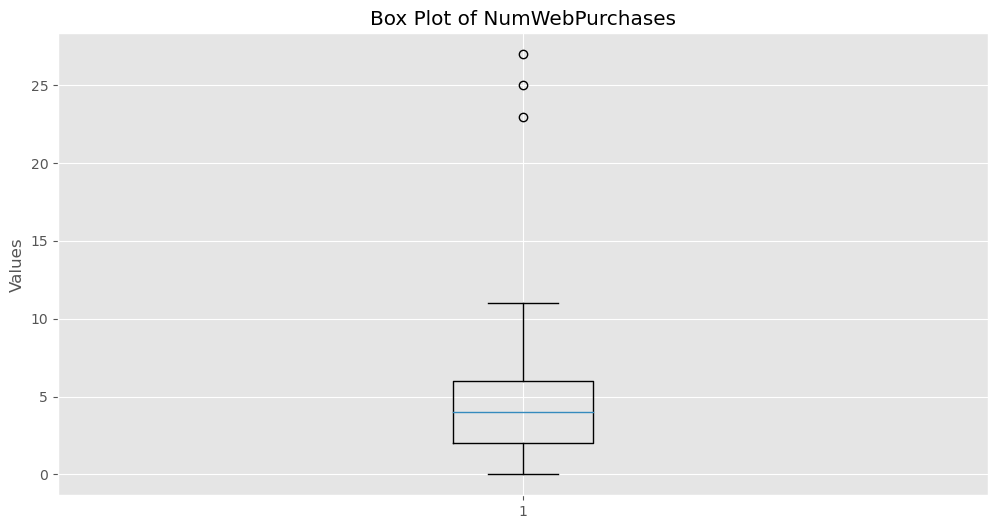

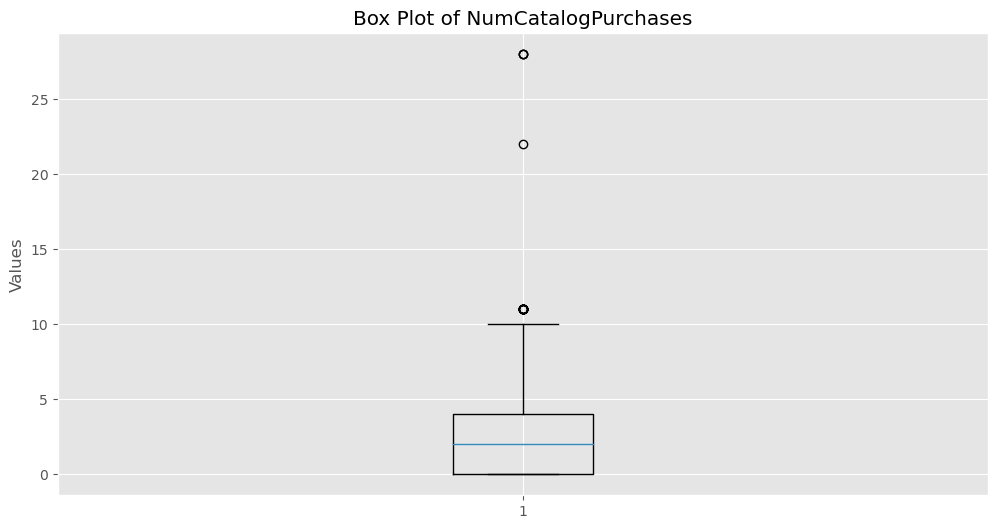

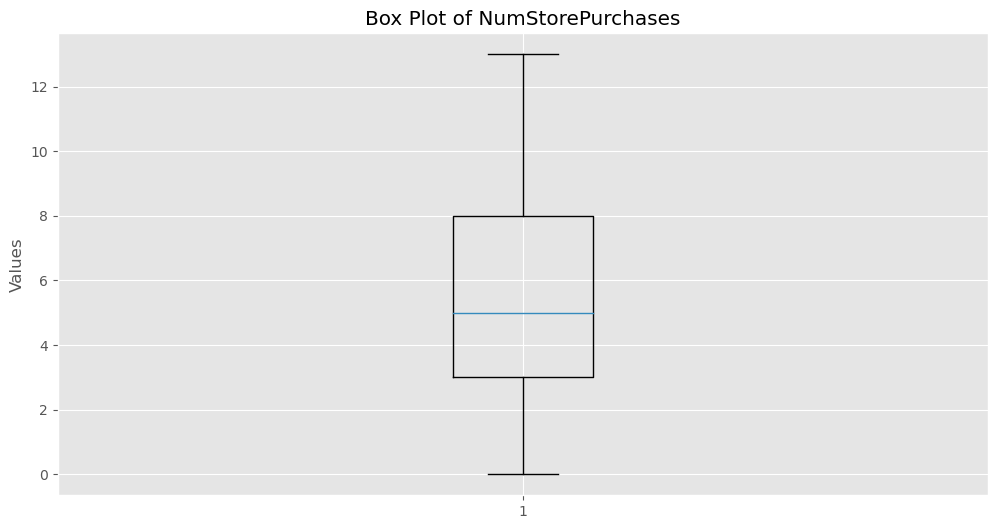

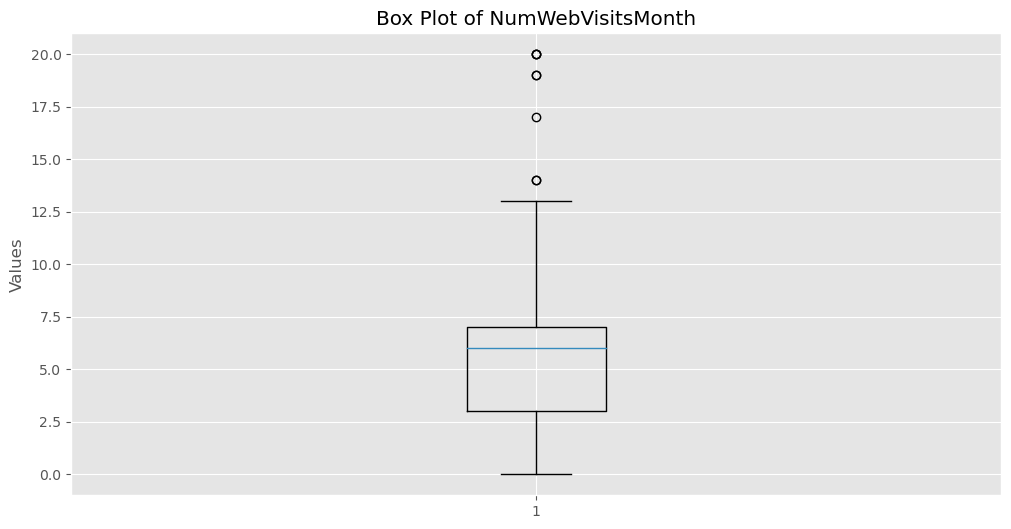

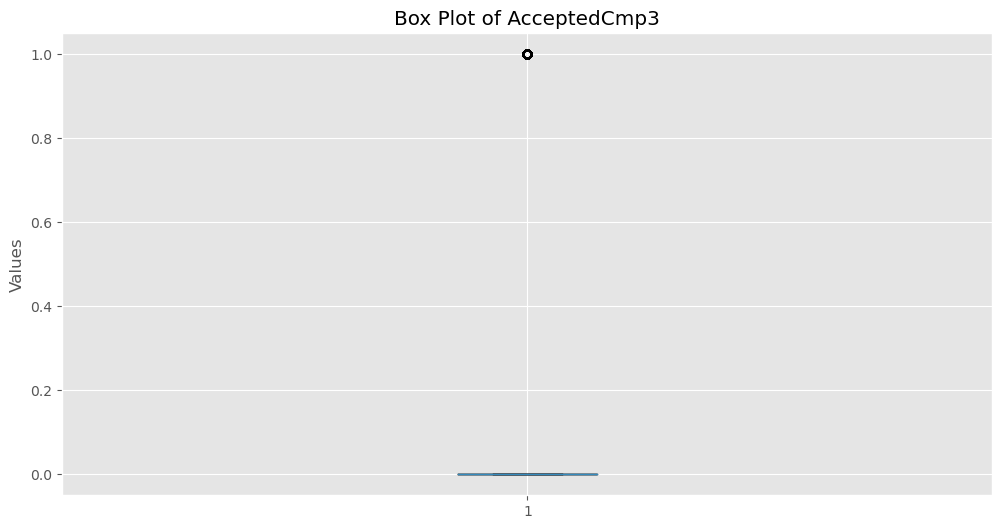

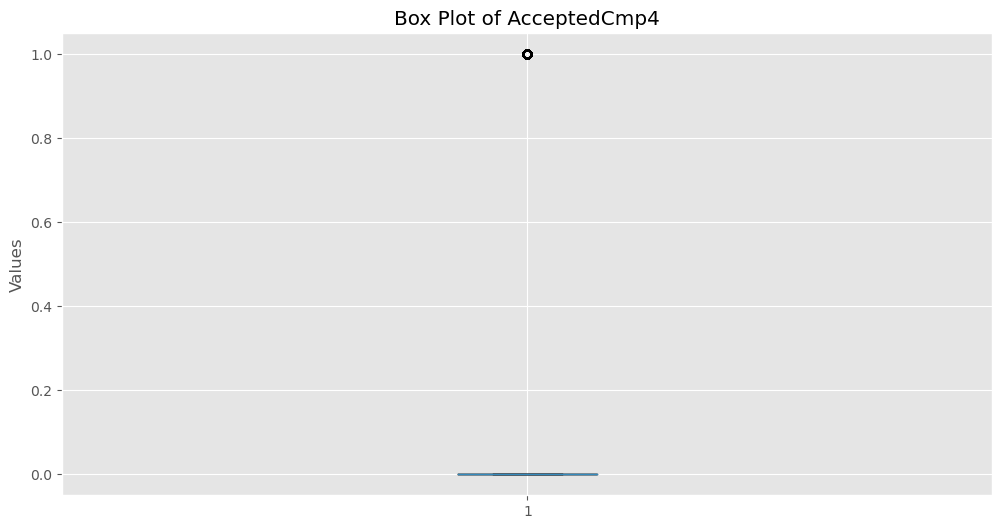

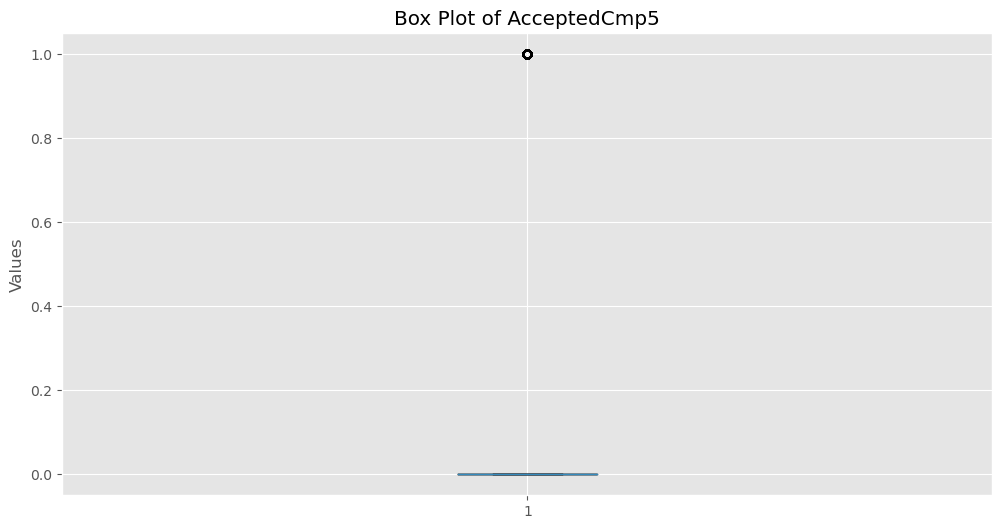

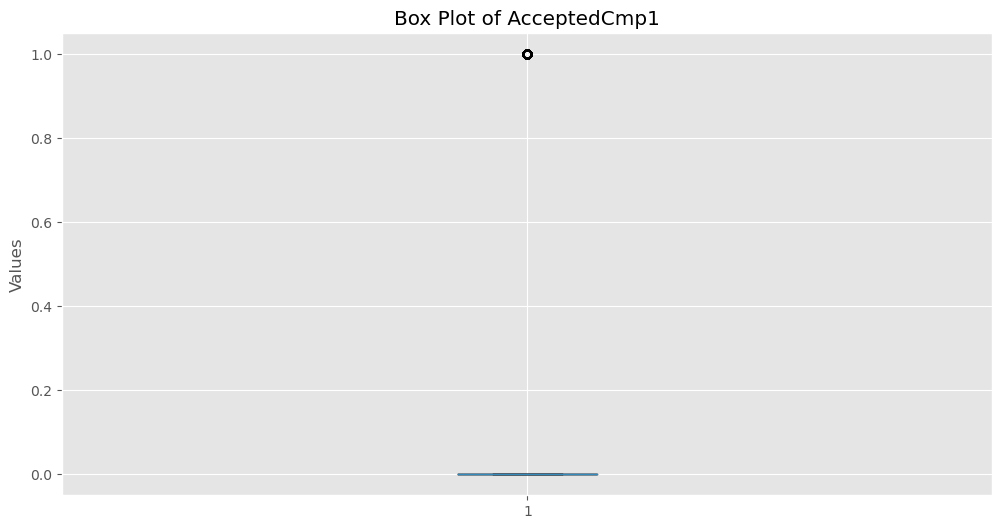

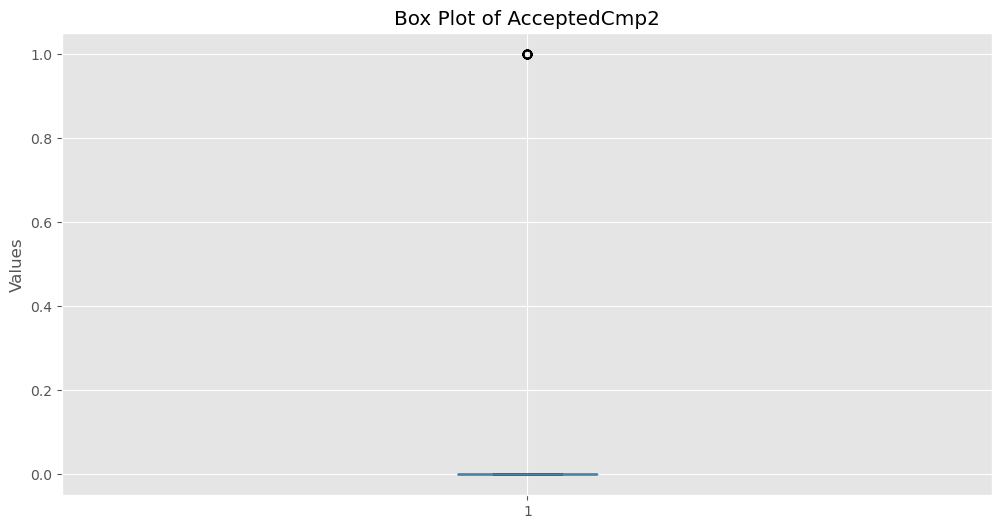

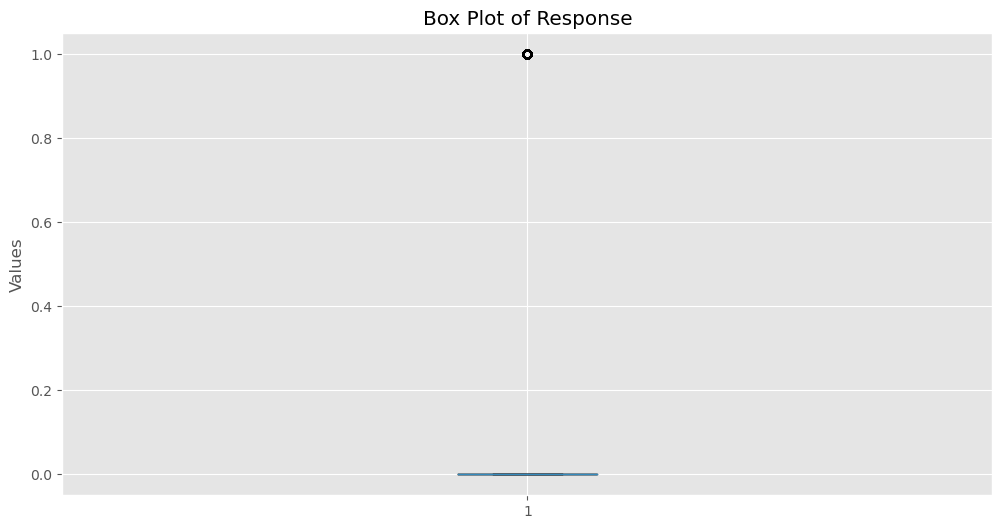

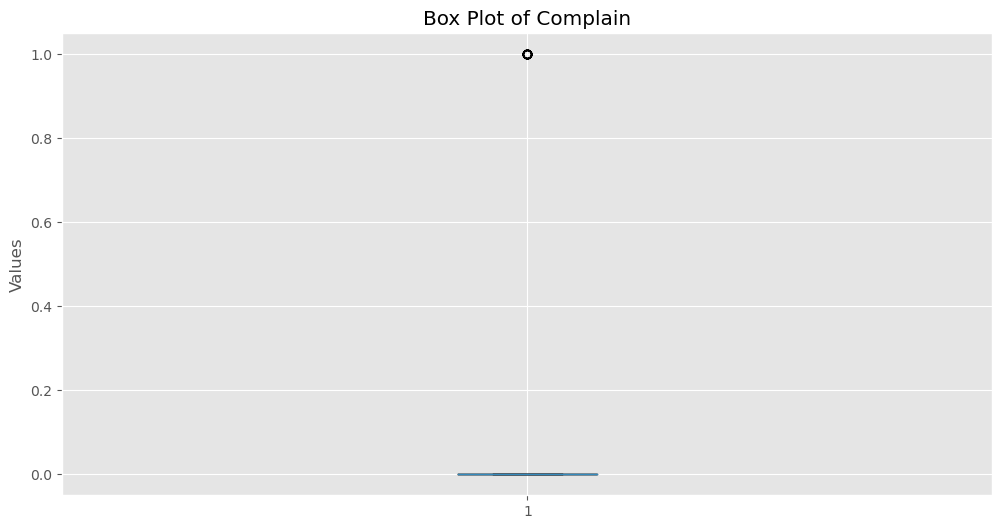

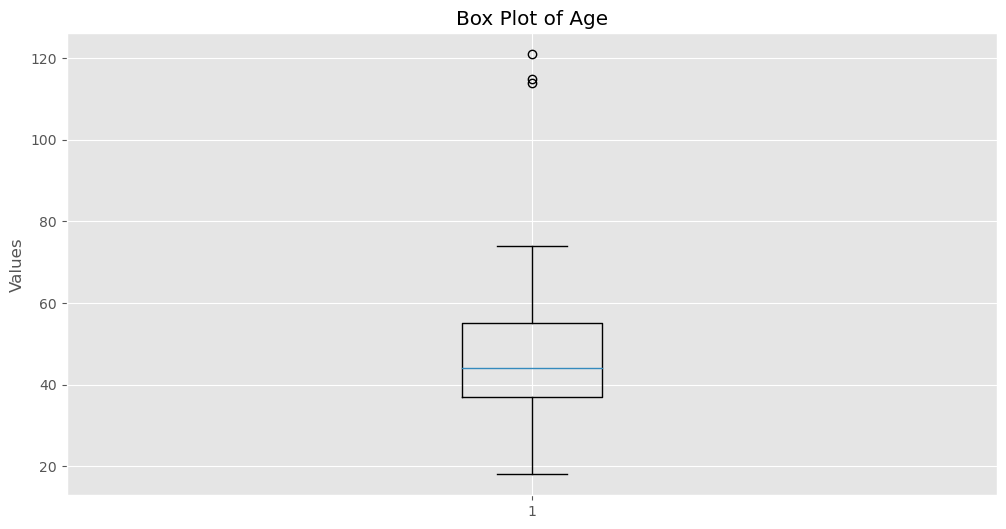

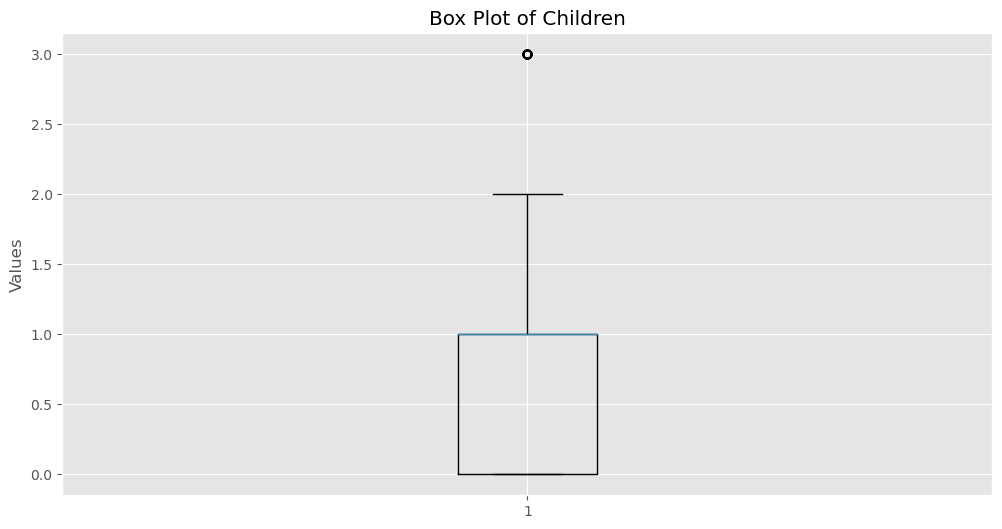

In [57]:
# Построим boxplots, чтобы визуально посмотреть на распределение данных в каждом параметре и вычислить выбросы
for column in other_columns:
#         plt.figure(figsize=(6, 4))
        plt.boxplot(other_columns[column])
        plt.title(f'Box Plot of {column}')
        plt.ylabel('Values')
        plt.show()

### Видим, что есть выбросы, но в рамках анализа данных мы их не будем убирать, уберем их перед тем, как перейдем к ML. 

### Обратим внимание, что в параметрах, связанных с продуктами довольно много выбросов — скорее всего это не выбросы, а оосбенности наших данных

# 2. Анализ данных / Data Analysis (EDA)

## 2.1. Персональные характеристики / Personal characteristics ( Year_Birth, Income, Kidhome, Teenhome, Recency, Dt_Customer, Country)

In [58]:
dictionary

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


In [59]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Children'],
      dtype='object')

In [60]:
personal_data = data2[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome','Dt_Customer','Recency','Country','Complain']]
products_data = data2[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']]
place_data = data2[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
campaigns_data = data2[['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']]

## 2.1. Products

In [61]:
products_data.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,305.335639,26.265099,167.365145,37.550945,27.002766,44.124942
std,337.330188,39.638045,225.181320,54.754453,41.032556,52.018798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,176.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,507.000000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


## 2.2. Complains

In [62]:
complainers = data2[data2.Complain == 1]
non_complainers = data2[data2.Complain == 0]

In [63]:
complainers.shape

(21, 30)

### Из 2216 клиентов всего 21 жалоба - это хорошо
### There are just 21 complainers out of 2216 customers — that is good

In [64]:
complainers.describe().style.set_sticky()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Children
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,6722.714286,1965.095238,45242.285714,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,25.761905,17.523810,27.476190,2.333333,3.619048,2.047619,5.238095,5.809524,0.095238,0.000000,0.047619,0.000000,0.000000,0.142857,1.000000,48.904762,1.190476
std,3314.618170,20.916273,19223.158027,0.577350,0.601585,28.522756,208.770209,38.367459,159.926114,37.993295,30.727218,39.901904,1.425950,2.906479,2.836833,3.590331,2.358369,0.300793,0.000000,0.218218,0.000000,0.000000,0.358569,0.000000,20.916273,0.813575
min,255.000000,1900.000000,15716.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000
25%,4427.000000,1954.000000,36640.000000,0.000000,0.000000,31.000000,16.000000,1.000000,14.000000,0.000000,1.000000,6.000000,1.000000,2.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.000000,1.000000
50%,6742.000000,1964.000000,38998.000000,1.000000,0.000000,49.000000,34.000000,6.000000,30.000000,7.000000,4.000000,17.000000,2.000000,3.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,1.000000
75%,9500.000000,1979.000000,58113.000000,1.000000,1.000000,77.000000,290.000000,27.000000,169.000000,38.000000,9.000000,26.000000,3.000000,5.000000,3.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000,2.000000
max,10995.000000,1995.000000,83257.000000,2.000000,2.000000,99.000000,629.000000,137.000000,590.000000,104.000000,107.000000,176.000000,7.000000,11.000000,10.000000,13.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,114.000000,3.000000


In [65]:
non_complainers.describe().style.set_sticky()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Children
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,5567.297020,1968.830540,52353.670391,0.439479,0.505587,48.987896,306.668529,26.285382,167.901769,37.666201,27.095438,44.287709,2.324488,4.101024,2.675512,5.801210,5.317039,0.073091,0.075419,0.074022,0.065177,0.013501,0.150838,0.000000,45.169460,0.945065
std,3251.902791,11.880250,25287.088905,0.536134,0.544667,28.995621,338.105119,39.658381,225.686916,54.886747,41.115158,52.104255,1.923893,2.743759,2.927857,3.246876,2.423597,0.260347,0.264128,0.261868,0.246895,0.115433,0.357974,0.000000,11.880250,0.746212
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,2796.500000,1959.000000,35376.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
50%,5435.500000,1970.000000,51523.500000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000
75%,8402.750000,1977.000000,68655.000000,1.000000,1.000000,74.000000,508.000000,33.000000,232.250000,50.000000,34.000000,57.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,121.000000,3.000000


In [66]:
complainers.Education.value_counts(normalize = True)

Graduation    0.666667
2n Cycle      0.190476
Master        0.095238
PhD           0.047619
Name: Education, dtype: float64

In [67]:
non_complainers.Education.value_counts(normalize = True)

Graduation    0.500931
PhD           0.218343
Master        0.167132
2n Cycle      0.088454
Basic         0.025140
Name: Education, dtype: float64

In [68]:
complainers.Country.value_counts(normalize = True)

Spain           0.666667
Saudi Arabia    0.142857
Canada          0.095238
Germany         0.047619
India           0.047619
Name: Country, dtype: float64

In [69]:
non_complainers.Country.value_counts(normalize = True)

Spain           0.483706
Saudi Arabia    0.154562
Canada          0.121508
Australia       0.067970
India           0.067505
Germany         0.053538
USA             0.049814
Mexico          0.001397
Name: Country, dtype: float64

In [70]:
complainers.Marital_Status.value_counts(normalize = True)

Married     0.380952
Single      0.285714
Together    0.238095
Divorced    0.095238
Name: Marital_Status, dtype: float64

In [71]:
non_complainers.Marital_Status.value_counts(normalize = True)

Married     0.386406
Together    0.259777
Single      0.215549
Divorced    0.104283
Widow       0.033985
Name: Marital_Status, dtype: float64

In [72]:
print("Complainer min time:" + ' ' + str(complainers.Dt_Customer.min()))
print("Complainer max time:" + ' ' + str(complainers.Dt_Customer.max()))
print(' ')

print("Non_Complainer min time:" + ' ' + str(non_complainers.Dt_Customer.min()))
print("Non_Complainer max time:" + ' ' + str(non_complainers.Dt_Customer.max()))

Complainer min time: 2012-09-03 00:00:00
Complainer max time: 2014-03-30 00:00:00
 
Non_Complainer min time: 2012-07-30 00:00:00
Non_Complainer max time: 2014-06-29 00:00:00


In [73]:
non_complainers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,Spain,44,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,Canada,53,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,USA,56,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,Australia,47,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,Spain,25,1


### Клиенты, которые пишут жалобы, не имеют каких-то общих отличительных характеристик / There are no significant items for complainers

In [74]:
data2.Education.value_counts(normalize = True)

Graduation    0.502536
PhD           0.216690
Master        0.166436
2n Cycle      0.089442
Basic         0.024896
Name: Education, dtype: float64

In [75]:
data2.Marital_Status.value_counts(normalize = True)

Married     0.386353
Together    0.259567
Single      0.216229
Divorced    0.104195
Widow       0.033656
Name: Marital_Status, dtype: float64

In [76]:
data2.Country.value_counts(normalize = True)

Spain           0.485477
Saudi Arabia    0.154449
Canada          0.121254
Australia       0.067312
India           0.067312
Germany         0.053481
USA             0.049331
Mexico          0.001383
Name: Country, dtype: float64

In [77]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Children'],
      dtype='object')

In [78]:
dictionary.loc[25]

Field                                                   Response
Description    1 if customer accepted the offer in the last c...
Name: 25, dtype: object

## 2.3. Marketing Campaings

In [79]:
data2['AcceptedCmp1'] = data2['AcceptedCmp1'].astype('bool')
data2['AcceptedCmp2'] = data2['AcceptedCmp2'].astype('bool')
data2['AcceptedCmp3'] = data2['AcceptedCmp3'].astype('bool')
data2['AcceptedCmp4'] = data2['AcceptedCmp4'].astype('bool')
data2['AcceptedCmp5'] = data2['AcceptedCmp5'].astype('bool')
data2['Response'] = data2['Response'].astype('bool')
data2['Complain'] = data2['Complain'].astype('bool')

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/3795598185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['AcceptedCmp1'] = data2['AcceptedCmp1'].astype('bool')
/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/3795598185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['AcceptedCmp2'] = data2['AcceptedCmp2'].astype('bool')
/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36218/3795598185.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [80]:
campaigns = data2[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]

In [81]:
campaigns_description = campaigns.describe()

In [82]:
campaigns_description

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2169,2169,2169,2169,2169,2169
unique,2,2,2,2,2,2
top,False,False,False,False,False,False
freq,2029,2140,2010,2007,2009,1842


In [83]:
campaigns_description = campaigns_description.T

In [84]:
campaigns_description

,count,unique,top,freq
AcceptedCmp1,2169,2,False,2029
AcceptedCmp2,2169,2,False,2140
AcceptedCmp3,2169,2,False,2010
AcceptedCmp4,2169,2,False,2007
AcceptedCmp5,2169,2,False,2009
Response,2169,2,False,1842


In [85]:
campaigns_description['Conversion Rate'] = \
(campaigns_description['count'] - campaigns_description['freq'])/(campaigns_description['count'])*100

In [86]:
campaigns_description

,count,unique,top,freq,Conversion Rate
AcceptedCmp1,2169,2,False,2029,6.454587
AcceptedCmp2,2169,2,False,2140,1.337022
AcceptedCmp3,2169,2,False,2010,7.330567
AcceptedCmp4,2169,2,False,2007,7.46888
AcceptedCmp5,2169,2,False,2009,7.376671
Response,2169,2,False,1842,15.076072


## 2.4. Channels

In [87]:
channels = pd.DataFrame(data2[[ 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending = False))

In [88]:
channels.sum()

0    27246
dtype: int64

In [89]:
channels['pr'] = channels[0]/27246*100

In [90]:
channels

,0,pr
NumStorePurchases,12571,46.138883
NumWebPurchases,8885,32.610291
NumCatalogPurchases,5790,21.250826


# 3. Подготовка данных к анализу с использованием ML методов

Чтобы подготовить данные к анализу с использованием ML значений, нам нужно исключить из датасета экстремальные значения (выбросы)

In [110]:
df_ml = data2[['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Children']]

In [111]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Children'],
      dtype='object')

Ранее мы уже проверили колонки 'Education', 'Marital_Status','Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country'— они не содержат выбросов.

Остались колонки 'Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Children']

### Мы видим, что в. колонках, связанных с продуктами довольно много экстремальных значений — скорее всего, это просто особенность наших данных

In [112]:
df_ml_to_clean = df_ml[['Income','MntWines', 'MntFruits', 
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Age', 'Children']]
columns = ['Income','MntWines', 'MntFruits', 
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Age', 'Children']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


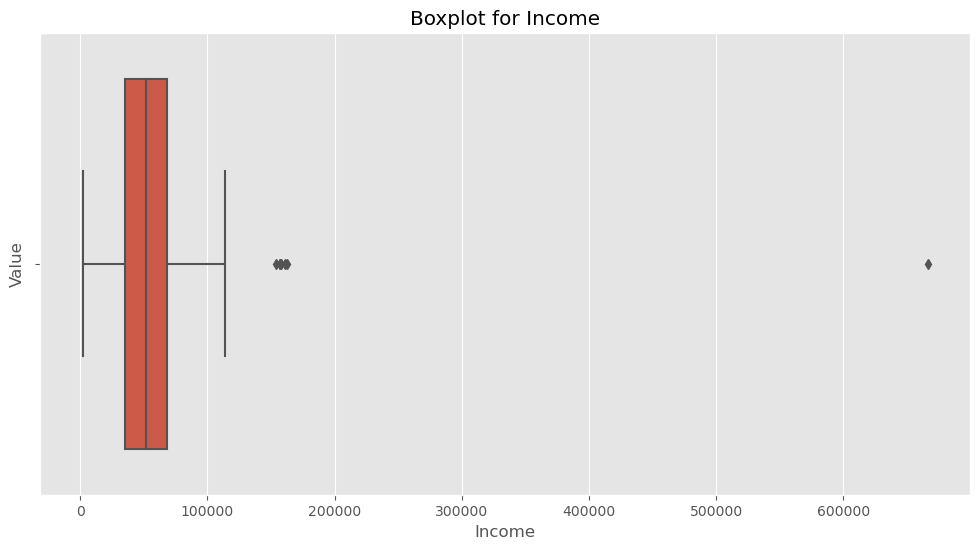

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


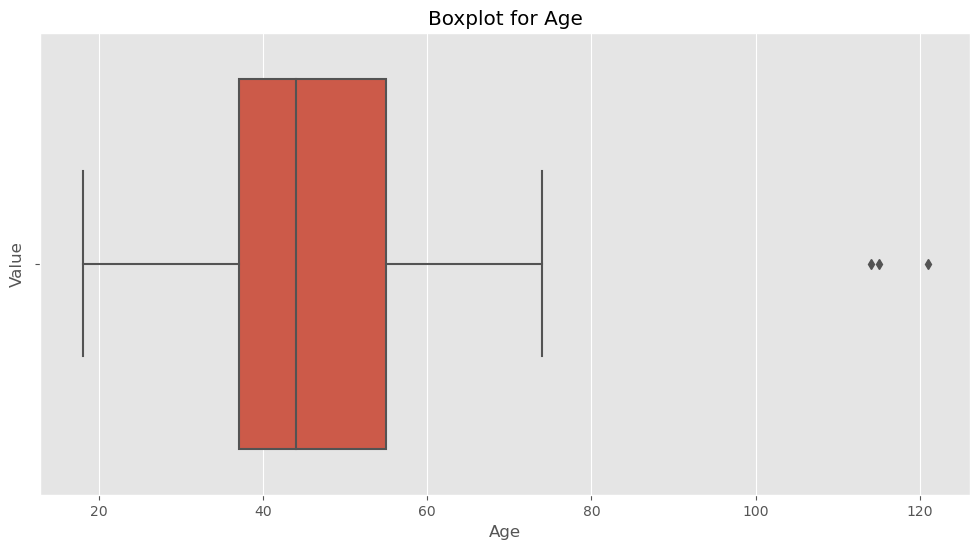

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


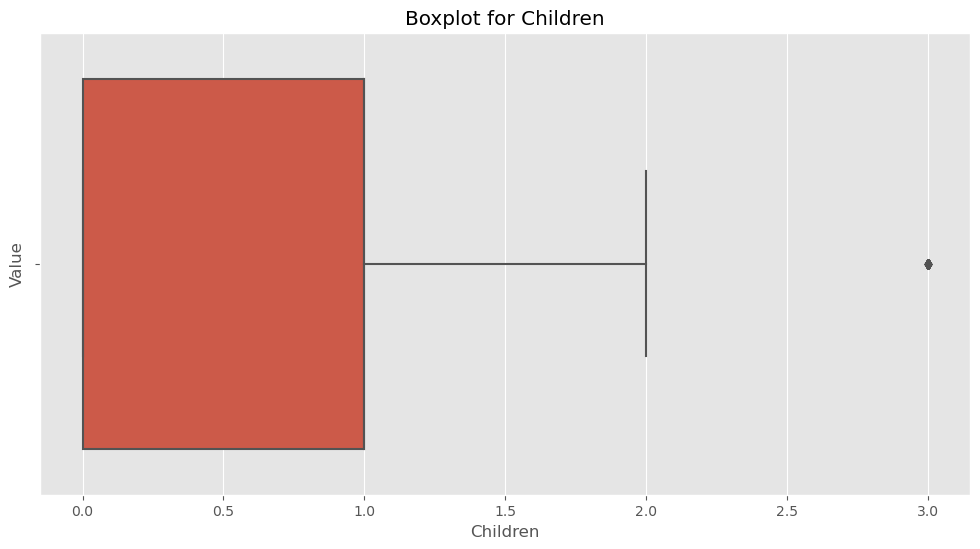

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


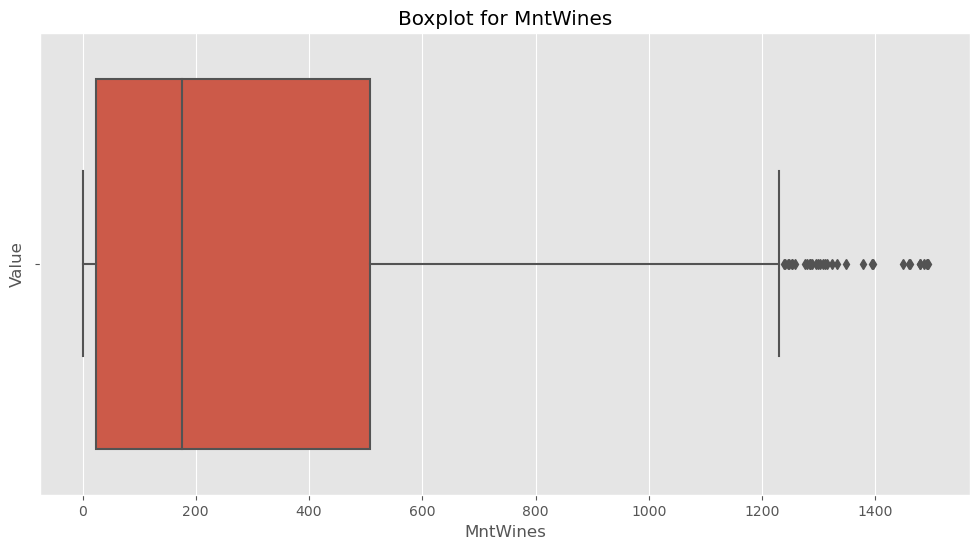

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


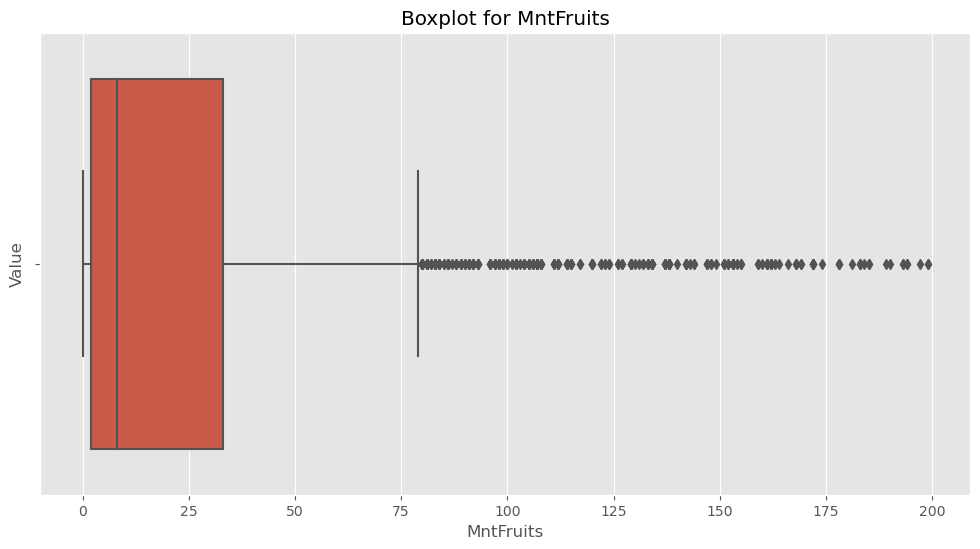

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


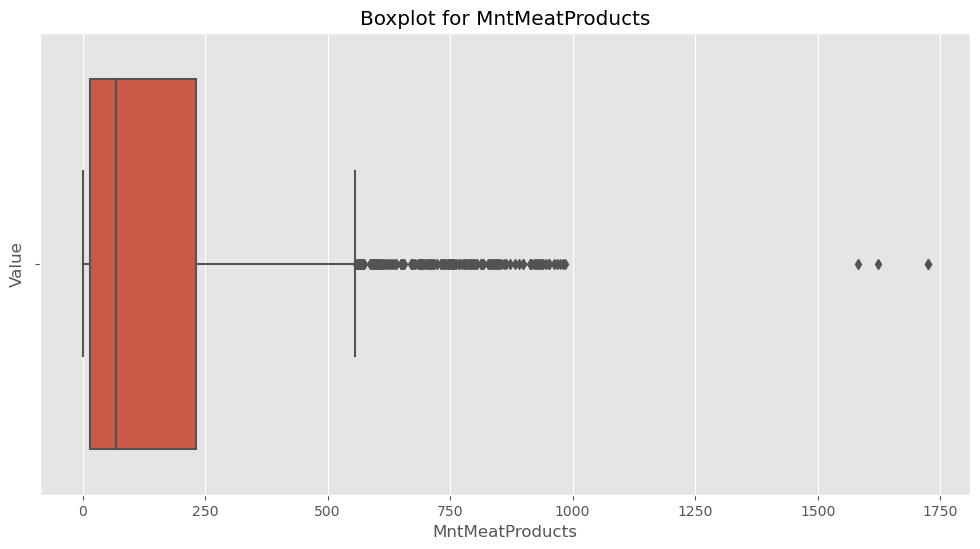

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


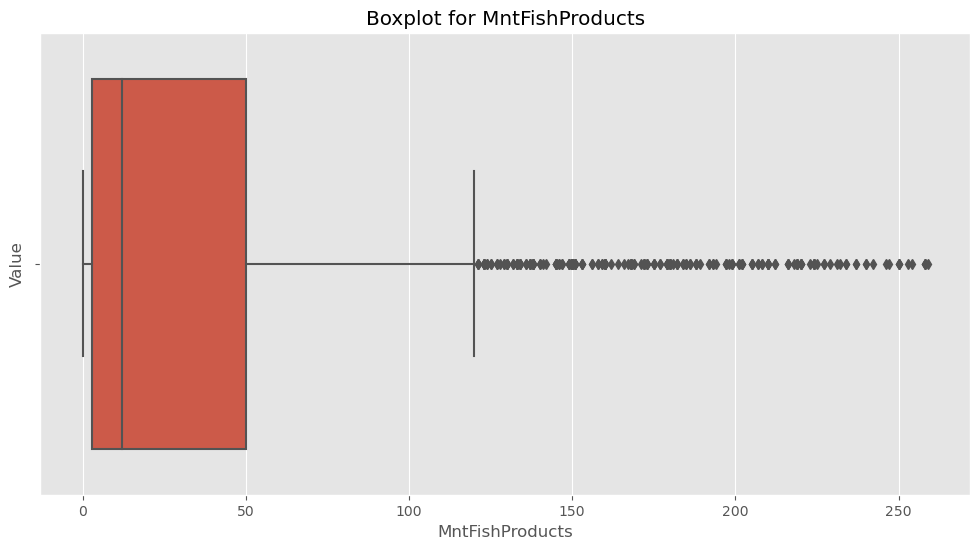

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


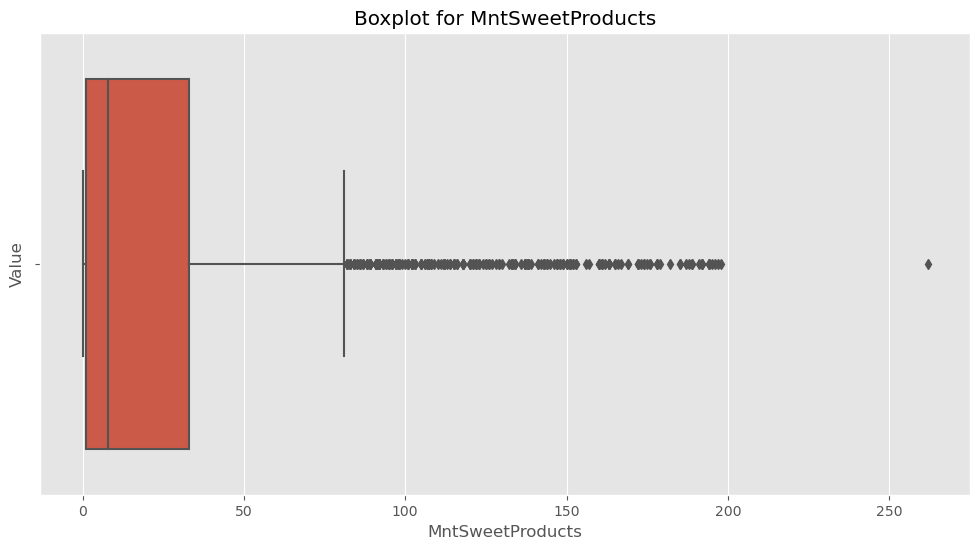

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


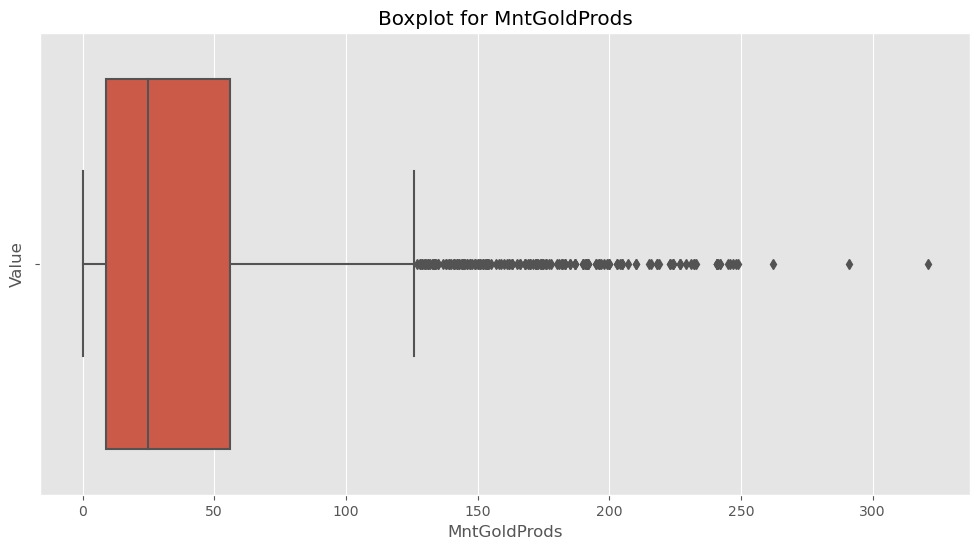

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


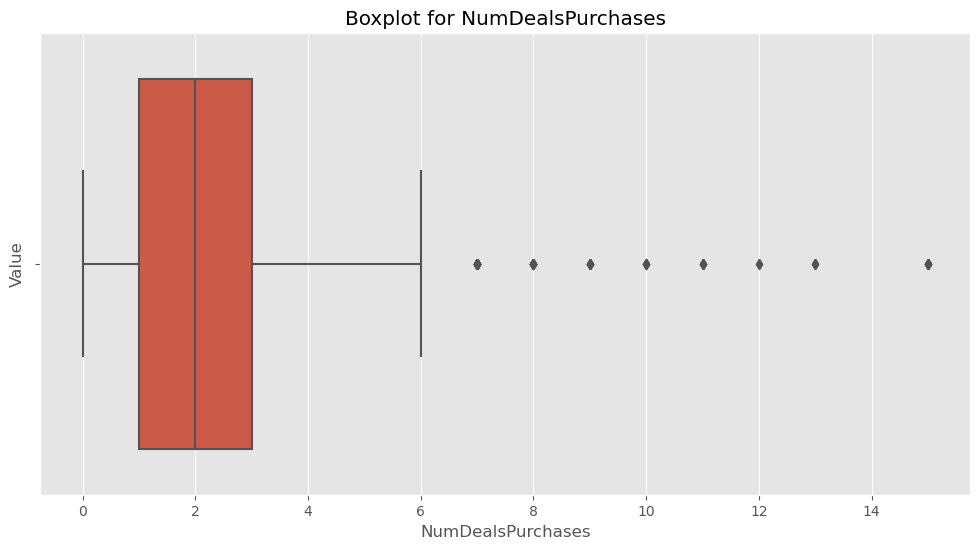

In [113]:
columns_to_plot = ['Income','Age','Children', 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
 'MntGoldProds','NumDealsPurchases']

plt.figure(figsize=(12, 6))  

for column in columns_to_plot:
    sns.boxplot(df_ml[column])
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.ylabel("Value")
    plt.show()

### Используем Метод IQR (межквартильный размах) для определения выбросов

In [114]:
import numpy as np

# Определяем квартили и IQR для каждого признака
Q1 = df_ml[columns].quantile(0.25)
Q3 = df_ml[columns].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов для каждого признака
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = np.logical_xor(df_ml[columns] < lower_bound, df_ml[columns] > upper_bound).any(axis=1)
df_ml_clean = df_ml[~outliers]


filtered_data = df_ml[outliers]


### При использовании этого способа для нахождения выбросов по всем столбцам выбросов довольно много —~30%

In [115]:
filtered_data

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
0,1826,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,111,...,False,False,False,False,False,True,False,Spain,44,0
5,7348,PhD,Single,71691.0,2014-03-17,0,336,130,411,240,...,False,False,False,False,False,True,False,Spain,56,0
6,4073,2n Cycle,Married,63564.0,2014-01-29,0,769,80,252,15,...,True,False,False,False,False,True,False,Germany,60,0
10,2079,2n Cycle,Married,81044.0,2013-12-27,0,450,26,535,73,...,False,False,False,False,False,False,False,USA,67,0
12,10530,PhD,Widow,67786.0,2013-12-07,0,431,82,441,80,...,False,False,False,False,False,True,False,India,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,2831,Graduation,Together,78416.0,2014-06-27,99,453,38,279,188,...,False,False,False,False,False,False,False,Spain,38,1
2226,1743,Graduation,Single,69719.0,2014-05-26,99,273,86,208,177,...,False,False,False,False,False,False,False,Spain,40,0
2233,7829,2n Cycle,Divorced,36640.0,2013-09-26,99,15,6,8,7,...,False,False,False,False,False,False,True,India,114,1
2238,528,Graduation,Married,65819.0,2012-11-29,99,267,38,701,149,...,False,False,False,False,False,False,False,India,36,0


In [116]:
df_ml_clean

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
1,1,Graduation,Single,57091.0,2014-06-15,0,464,5,64,7,...,False,False,False,False,True,True,False,Canada,53,0
2,10476,Graduation,Married,67267.0,2014-05-13,0,134,11,59,15,...,False,False,False,False,False,False,False,USA,56,1
3,1386,Graduation,Together,32474.0,2014-05-11,0,10,0,1,0,...,False,False,False,False,False,False,False,Australia,47,2
4,5371,Graduation,Single,21474.0,2014-04-08,0,6,16,24,11,...,True,False,False,False,False,True,False,Spain,25,1
7,1991,Graduation,Together,44931.0,2014-01-18,0,78,0,11,0,...,False,False,False,False,False,False,False,Spain,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,7232,Graduation,Widow,42429.0,2014-02-11,99,55,0,6,2,...,False,False,False,False,False,False,False,Spain,41,1
2234,9977,Graduation,Divorced,78901.0,2013-09-17,99,321,11,309,33,...,False,False,False,False,False,False,False,USA,41,1
2235,10142,PhD,Divorced,66476.0,2013-03-07,99,372,18,126,47,...,False,False,False,False,False,False,False,USA,38,1
2236,5263,2n Cycle,Married,31056.0,2013-01-22,99,5,10,13,3,...,False,False,False,False,False,False,False,Spain,37,1


## Посчитаем выбросы только для НЕпродуктовых колонок

In [117]:
import numpy as np

# Определяем квартили и IQR для каждого признака
Q1 = df_ml[['Income','Age','Children']].quantile(0.25)
Q3 = df_ml[['Income','Age','Children']].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов для каждого признака
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = np.logical_xor(df_ml[['Income','Age','Children']] < lower_bound, df_ml[['Income','Age','Children']] > upper_bound).any(axis=1)
df_ml_clean = df_ml[~outliers]


filtered_data = df_ml[outliers]


In [118]:
filtered_data

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
19,2795,Master,Single,30523.0,2013-07-01,0,5,0,3,0,...,False,False,False,False,False,False,False,Canada,56,3
32,5824,PhD,Together,34578.0,2014-04-11,1,7,0,1,0,...,False,False,False,False,False,False,False,Australia,42,3
52,7264,2n Cycle,Single,52195.0,2014-05-12,2,12,0,4,0,...,False,False,False,False,False,False,False,Saudi Arabia,36,3
84,8461,Graduation,Divorced,46102.0,2014-03-10,3,14,0,1,0,...,False,False,False,False,False,False,False,Spain,52,3
189,7284,Graduation,Married,48686.0,2013-12-04,8,10,0,7,2,...,False,False,False,False,False,False,False,Spain,61,3
252,6404,Graduation,Together,58917.0,2013-03-24,10,151,7,89,0,...,False,False,False,False,False,False,False,Saudi Arabia,45,3
263,2552,PhD,Single,55521.0,2013-10-22,11,416,0,26,0,...,False,True,False,False,False,True,False,Spain,59,3
325,4931,Graduation,Together,157146.0,2013-04-29,13,1,0,1725,2,...,False,False,False,False,False,False,False,Saudi Arabia,37,0
497,1501,PhD,Married,160803.0,2012-08-04,21,55,16,1622,17,...,False,False,False,False,False,False,False,USA,32,0
513,11004,2n Cycle,Single,60182.0,2014-05-17,23,8,0,5,7,...,False,False,False,False,False,False,False,Saudi Arabia,121,1


In [119]:
# Сохраняем очищенный датасет для дальнейшего анализа
df_ml_clean.to_csv('df_ml_clean.csv', index=False)